In [1]:
from sklearn.linear_model import LogisticRegression




from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score, roc_curve, roc_auc_score, RocCurveDisplay



In [2]:
import pickle
with open('/kaggle/input/pca-processed-uci/pca-processed-uci.pkl', 'rb') as f:
    df=pickle.load(f)
   

In [3]:
df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,target
0,-1.142929,0.304724,-1.149042,-0.158837,0.876139,0.595961,0.176824,-0.009395,0.174649,-0.912271,0.564693,-0.136827,0
1,-2.754957,0.839171,0.146543,-0.662535,-0.784552,0.343510,0.803580,-0.391040,-0.013703,0.236447,0.145463,-0.366100,2
2,-2.227239,-1.063098,0.476438,0.004591,0.701716,0.722079,-0.727509,-0.075420,-0.514487,-0.172939,-0.095164,0.162051,1
3,1.140714,-0.565884,-1.654154,2.411838,1.395045,-0.672393,0.620638,-0.000940,0.593531,0.182818,-0.108343,-0.372634,0
4,1.701610,-0.278171,-1.043368,0.592310,0.262726,0.785178,0.685079,-0.625560,0.110237,0.073178,0.459393,0.353327,0


In [4]:

df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

print(df["target"].value_counts())


target
0    160
1    137
Name: count, dtype: int64


=== Logistic Regression ===
Accuracy: 0.85
Precision: 0.7777777777777778
Recall: 0.875
F1-score: 0.823529411764706
AUC: 0.9386574074074073


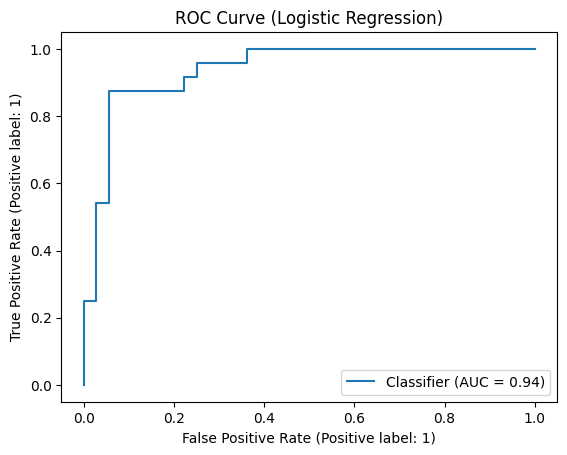

In [5]:
import matplotlib.pyplot as plt
x=df.drop('target', axis=1)
y=df['target']

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve (Logistic Regression)")
plt.show()


=== Random Forest Classifier ===
Accuracy: 0.9
Precision: 0.8461538461538461
Recall: 0.9166666666666666
F1-score: 0.8799999999999999
AUC: 0.9386574074074073


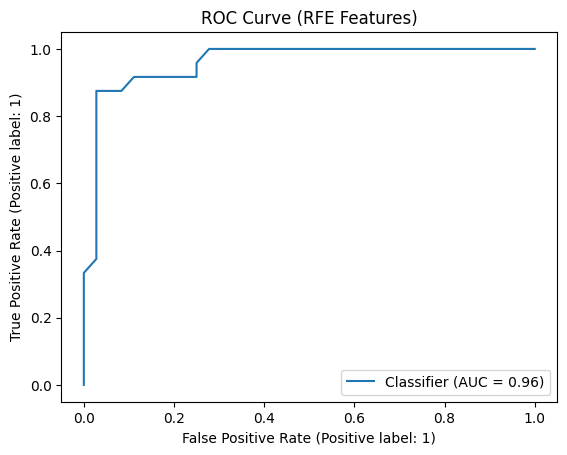

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred_rf=rf.predict(x_test)
y_prob_rf = rf.predict_proba(x_test)[:, 1]

print("=== Random Forest Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_prob))

RocCurveDisplay.from_predictions(y_test,y_prob_rf)
plt.title("ROC Curve (RFE Features)")
plt.show()



=== decision tree ===
Accuracy: 0.75
Precision: 0.7142857142857143
Recall: 0.625
F1-score: 0.6666666666666666
AUC: 0.9386574074074073


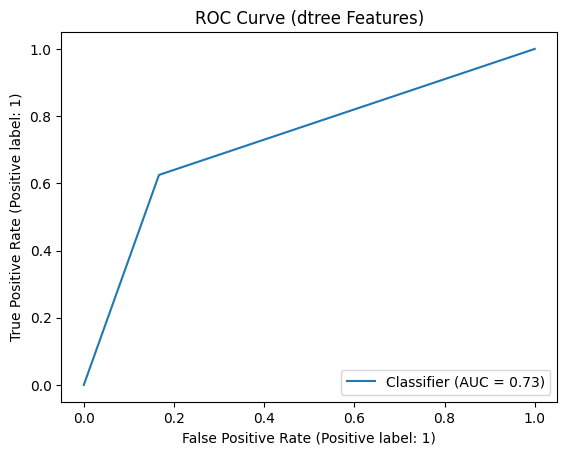

In [7]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

y_pred_dtree=dtree.predict(x_test)
y_prob_dtree = dtree.predict_proba(x_test)[:, 1]

print("=== decision tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Precision:", precision_score(y_test, y_pred_dtree))
print("Recall:", recall_score(y_test, y_pred_dtree))
print("F1-score:", f1_score(y_test, y_pred_dtree))
print("AUC:", roc_auc_score(y_test, y_prob))

RocCurveDisplay.from_predictions(y_test,y_prob_dtree)
plt.title("ROC Curve (dtree Features)")
plt.show()

=== Support Vector Machine ===
Accuracy: 0.8833333333333333
Precision: 0.84
Recall: 0.875
F1-score: 0.8571428571428572
AUC: 0.9351851851851852


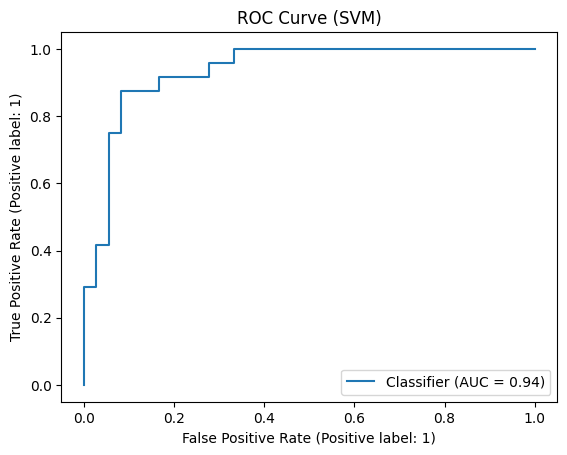

In [8]:
from sklearn.svm import SVC


svm = SVC(probability=True, kernel="rbf", random_state=42)  

svm.fit(x_train, y_train)


y_pred_svm = svm.predict(x_test)
y_prob_svm = svm.predict_proba(x_test)[:, 1]  # probability of class 1


print("=== Support Vector Machine ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm))
print("AUC:", roc_auc_score(y_test, y_prob_svm))


RocCurveDisplay.from_predictions(y_test, y_prob_svm)
plt.title("ROC Curve (SVM)")
plt.show()
